#### В данном ноутбуке приведено небольшое задание, которое поможет узнать основные методы библиотеки pandas (включая выгрузку данных из SQL-базы)

**[0]** Импортируем модуль pandas

In [1]:
import pandas as pd

**[1]** Для начала выгрузим данные из БД. Для этого в текущей папке у вас должен лежать файл с логином и паролем db_access.txt

In [2]:
with open('./db_access.txt') as f:
    user = f.readline()
    password = f.readline()

db = {
    'user': user,
    'password': password,
    'host': 'blackbox-01.mysql.avia.tutu.ru',
    'raise_on_warnings': True
}

def db_getdata(dbconf, query):
    import mysql.connector
    import pandas as pd
    conn = mysql.connector.connect(**dbconf)
    df = pd.DataFrame()
    df = pd.read_sql(query, conn, coerce_float= False)
    conn.close()
    return df

sql_feedback = '''
select tf.*
  from avia.rm_rycontent_train_feedback tf
 where tf.`status` = 'approved'
'''

data = db_getdata(db, sql_feedback)

In [3]:
data.head()

,id,order_id,cdate,route_date,client_name,email,train_number,return_train_number,car_number,car_category,...,staff_rating,furniture_rating,has_biotoilet,has_conditioning,toilet_rating,sockets_rating,can_be_published,status,sockets_placement,seat_rotation
0,322,8629403,2016-06-15 13:54:47,2016-06-14,Николай Тимин,nntimin@gmail.com,723М,None,02,sedentary,...,5.0,5.0,no,no,3.0,2.0,1,approved,None,None
1,324,8316821,2016-06-15 14:11:39,2016-06-13,Нелли Аюпова,nelli-ayupova@mail.ru,120В,119В,22,plazcard,...,5.0,3.0,no,no,1.0,2.0,1,approved,None,None
2,325,8160242,2016-06-15 14:12:51,2016-06-13,Ирма,irma111@yandex.ru,397А,397С,06,plazcard,...,5.0,5.0,yes,yes,4.0,5.0,1,approved,None,None
3,326,8597738,2016-06-15 14:15:48,2016-07-19,Наталья Горина,natalyaboyarkina@yandex.ru,109Ж,109А,14,plazcard,...,4.0,3.0,no,no,3.0,4.0,0,approved,None,None
4,329,7834749,2016-06-15 14:31:24,2016-04-29,Елена Пучкина,vadim.elena.36@mail.ru,126Я,126Ч,03,plazcard,...,5.0,5.0,no,who_knows,4.0,NaN,1,approved,None,None


**[2]** Сохранение данных
* Сохраните выгруженные данные в csv файл в текущую папку
* Для записи используйте кодировку "utf-8"
* В качестве разделителя для чисел используйте ".", а для полей ";"

In [4]:
### Код
data.to_csv('file_data.csv', sep=';', decimal='.', encoding='utf-8')

**[3]** Считывание файлов
* Считайте файл, выведите первые пять строк
* Обратите внимание что поля с датами по умолчанию будут восприниматься как объекты, для правильного форматирования в read_csv нужно передать некоторый параметр (см. документацию pandas)
* Считайте поле cdate как дату

In [1]:
### Код
df=pd.read_csv('file_data.csv', sep=';', decimal='.', encoding='utf-8')
df.head()

NameError: name 'pd' is not defined

**[4]** Оценка данных
* Выведите информацию о загруженном dataframe. Используйте метод info()
* Данный метод также показывает сколько места в ОП занимают данные

In [6]:
### Код
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135216 entries, 0 to 135215
Data columns (total 27 columns):
Unnamed: 0             135216 non-null int64
id                     135216 non-null int64
order_id               135216 non-null int64
cdate                  135216 non-null datetime64[ns]
route_date             135216 non-null object
client_name            130609 non-null object
email                  133410 non-null object
train_number           135216 non-null object
return_train_number    128231 non-null object
car_number             135216 non-null int64
car_category           135216 non-null object
seat_numbers           135216 non-null object
service_class          135213 non-null object
car_carrier            133194 non-null object
text                   132889 non-null object
total_rating           133683 non-null float64
temperature_rating     9695 non-null float64
staff_rating           133617 non-null float64
furniture_rating       133542 non-null float64
has_bioto

* Из полученного dataframe удалите столбец с текстом отзыва и именем клиента, не меняя исходный dataframe
* Посмотрите насколько меньше места он стал занимать

In [7]:
### Код
df=df.drop(columns=['text','client_name'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135216 entries, 0 to 135215
Data columns (total 25 columns):
Unnamed: 0             135216 non-null int64
id                     135216 non-null int64
order_id               135216 non-null int64
cdate                  135216 non-null datetime64[ns]
route_date             135216 non-null object
email                  133410 non-null object
train_number           135216 non-null object
return_train_number    128231 non-null object
car_number             135216 non-null int64
car_category           135216 non-null object
seat_numbers           135216 non-null object
service_class          135213 non-null object
car_carrier            133194 non-null object
total_rating           133683 non-null float64
temperature_rating     9695 non-null float64
staff_rating           133617 non-null float64
furniture_rating       133542 non-null float64
has_biotoilet          131163 non-null object
has_conditioning       131217 non-null object
toilet_ra

**[5]** Предобработка данных
* Теперь оставим в dataframe только те колонки, которые нам понадобятся в дальнейшем. Это ['order_id', 'cdate', 'route_date', 'email', 'train_number', 'car_category', 'car_carrier', 'total_rating', 'has_conditioning', 'status', 'text']. Не используйте метод drop
* В полученном dataframe сделайте поле 'order_id' индексом
* Удалите все строки, которые не содержат email пользователя (не NaN значения) и у которых стоит пустая общая оценка (total_rating)
* Выведите полученный dataframe

In [9]:
### Код
df=data[['order_id', 'cdate', 'route_date', 'email', 'train_number', 
      'car_category', 'car_carrier', 'total_rating', 
      'has_conditioning', 'status', 'text']]


In [10]:
df.index=df['order_id']

In [13]:
df1=df[(df['email']!='') & (df['total_rating']!='')] 
df=df1

In [14]:
df

,order_id,cdate,route_date,email,train_number,car_category,car_carrier,total_rating,has_conditioning,status,text
order_id,,,,,,,,,,,
8629403,8629403,2016-06-15 13:54:47,2016-06-14,nntimin@gmail.com,723М,sedentary,ФПК,3.0,no,approved,2 туалета на состав - это мало!
8316821,8316821,2016-06-15 14:11:39,2016-06-13,nelli-ayupova@mail.ru,120В,plazcard,ФПК,2.0,no,approved,"Просто старый вагон, на таких ездили еще лет 4..."
8160242,8160242,2016-06-15 14:12:51,2016-06-13,irma111@yandex.ru,397А,plazcard,ФПК,5.0,yes,approved,Начиталась предыдущих отзывов - страшно было с...
8597738,8597738,2016-06-15 14:15:48,2016-07-19,natalyaboyarkina@yandex.ru,109Ж,plazcard,ФПК,4.0,no,approved,
7834749,7834749,2016-06-15 14:31:24,2016-04-29,vadim.elena.36@mail.ru,126Я,plazcard,ФПК,5.0,who_knows,approved,Ехала в поезде Череповец-Москва 13-го июня 10 ...
8183733,8183733,2016-06-15 14:40:16,2016-06-14,famter@yandex.ru,380Г,plazcard,ФПК,4.0,who_knows,approved,
8485719,8485719,2016-06-15 14:46:29,2016-06-14,anna160810@rambler.ru,729Г,sedentary,ФПК,4.0,yes,approved,"Все хорошо, но мало туалетов , большая очередь."
8253213,8253213,2016-06-15 14:52:19,2016-06-13,erinam63@mail.ru,002Р,coupe,ЛДЗ,4.0,who_knows,approved,
8355161,8355161,2016-06-15 14:56:30,2016-06-13,sofita2007@mail.ru,120В,plazcard,ФПК,5.0,no,approved,Сайт хороший. Билеты купили и сразу оплатили н...


**[6]** Работа со строками
* Теперь давайте сравним средний рейтинг для сделующих типов отзывов:
    1. В тексте содержится упоминание Туту ('tutu' или 'туту')
    2. Есть текст, но Туту не упоминается
    3. Текст отзыва отсутствует
* Используйте string methods библиотеки pandas

In [15]:
### Код
print(df[(df['text'].str.find('tutu')!=-1) | 
         (df['text'].str.find('туту')!=-1)
         ]['total_rating'].mean())

print(df[( (df['text'].str.find('tutu')==-1) & 
           (df['text'].str.find('туту')==-1))&
           (df['text']!='')&
           (df['text']!='NaN')
        ]['total_rating'].mean())

print(df[(df['text']=='')|(df['text']=='NaN')]['total_rating'].mean())

4.491869918699187
4.116570452448315
4.339982653946227


* Сравните средний рейтинг для сидячих вагонов и плацкартов + купе

In [16]:
### Код
print(df[df['car_category']=='sedentary']['total_rating'].mean())
print(df[(df['car_category']=='plazcard')|(df['car_category']=='coupe')]['total_rating'].mean())

4.397809773656275
4.024356347989006


**[7]** Splitting строк, подсчет значений в массиве
* Давайте посмотрим какие почтовые сервисы наиболее популярны у наших клиентов
* Для этого заведите новое поле "mail_service", обрезав поле email по символу "@" (не забудьте привести поле к нижнему регистру)
* После этого посчитайте популярность каждого сервиса в процентах и выведите топ-5

In [55]:
### Код
df['mail_service']=df['email'].str.split(pat = '@').str[1]
df['mail_service']= df['mail_service'].str.lower()                                       

In [63]:
df.groupby(['mail_service'],sort=False)['order_id'].count().head()


mail_service
gmail.com     23385
mail.ru       60164
yandex.ru     28068
rambler.ru     3755
bk.ru          4703
Name: order_id, dtype: int64

**[8]** Группировки
* Теперь посчитаем средний рейтинг каждого перевозчика. Поскольку заранее неизвестно какие они бывают, лучше использовать метод groupby
* Также, чтобы понимать насколько репрезентативны полученные средние, необходимо оценить размер выборки по уникальным людям
* Выведите средний рейтинг по каждому перевозчику и количество уникальных проголосовавших email'ов
* Название перевозчика сделайте обычным столбцом, а не индексом

In [97]:
### Код
carrier=df.groupby(['car_carrier']).agg({'total_rating':'mean', 'email':'nunique'}).reset_index()
carrier=carrier.sort_values('total_rating', ascending=False)
carrier.head()

,car_carrier,total_rating,email
3,АРЛАН,5.000000,3
18,ТКС,4.782926,1797
6,ДОСС,4.698617,8235
5,ГРАНД,4.630225,301
16,ТВЕРСК,4.585480,419


In [91]:
df['email'].nunique()

111245

**[9]** Работа с датами
* Посмотрим насколько свежи воспоминания о поездке у наших клиентов в тот момент, когда они оставляют отзывы
* Для этого необходимо преобразовать поле 'route_date' к формату поля 'cdate', посчитать разницу в днях и построить распределение по количеству дней между этими событиями. Необходимо учесть что есть "странные" отзывы, в которых дата создания отзыва предшествует дате поездки, такие надо выкинуть из статистики
* Полученные результаты отсортируйте по количеству дней и выведите первые 20 значений

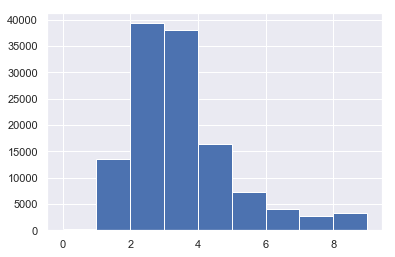

In [181]:
### Код
import datetime
import numpy as np
import matplotlib.pyplot as plt
pd.to_datetime(df['route_date'])
diff=round((df['cdate']-df['route_date'])/np.timedelta64(1, 'D'))
diff=diff[diff>=0]
plt.hist(diff, range (0,10))
plt.show()

In [189]:
diff.value_counts().head(20)

2.0     39347
3.0     38083
4.0     16313
1.0     13626
5.0      7325
6.0      4107
7.0      2682
8.0      1892
9.0      1357
10.0     1170
11.0      939
12.0      789
13.0      650
14.0      549
15.0      454
16.0      425
17.0      372
18.0      310
0.0       310
19.0      285
dtype: int64

**[10]** Объединение двух dataframe, группировка, работа с датами
* Теперь посчитаем как изменилась оценка поезда для наших "опытных" путешественников (может со временем наши отзывы/фильтры/фото улучшаются и пользователи могут выбрать поезд получше? Или перевозчики улучшают свои вагоны?). Все будем группировать по email 
* Необходимо для тех, кто совершал несколько покупок, получить их первую/последнюю оценку поезда и тип вагона (самая верхняя и нижняя строка для 1-го email в dataframe) и сформировать новый dataframe, в котором будут колонки email, first_rating, last_rating, first_car_type, last_car_type
* Ипользуйте вспомогательные dataframe и метод merge для их объединения (аналог join в sql)

In [310]:
### Код
recall = df[['email','cdate','car_category','total_rating']]
#осталяем строки, где email хотя бы раз повторяется
prop = lambda x: (len(x['cdate'])>1) 
recall = recall.groupby(['email']).filter(prop)
first = recall.groupby(['email']).first().reset_index()
last = recall.groupby(['email']).last().reset_index()
change=pd.merge(first,last, on='email', how='inner')
change=change.rename(columns={'car_category_x': 'first_car_type','car_category_y': 'last_car_type',
                              'total_rating_x': 'first_rating','total_rating_y': 'last_rating' })
change=change[['email', 'first_rating','last_rating', 'first_car_type', 'last_car_type']]
change.head()

,email,first_rating,last_rating,first_car_type,last_car_type
0,+79044458235@yandex.ru,1.0,3.0,plazcard,plazcard
1,000161galant@gmail.com,2.0,5.0,coupe,sedentary
2,004@meb52.com,4.0,4.0,sedentary,coupe
3,0147390@gmail.com,1.0,3.0,plazcard,plazcard
4,017marin@mail.ru,1.0,5.0,coupe,plazcard


**[11]** Применение функций к строкам dataframe, создание новых колонок
* Напишите функцию, которая будет принимать строку из полученного dataframe, сравнивать категории вагона в первой и последней поездки и, в случае их равенства, считать изменение рейтинга в %. Если категории не равны, функция должна возвращать 'incorrect_comparison'
* Примените функцию к dataframe и запишите результат в новую колонку "rating_diff"

In [367]:
### Код
def diff(x):
    if x['first_car_type']!=x['last_car_type']: 
        return 'incorrect_comparison'
    else: 
        return (x['last_rating']-x['first_rating'])/x['first_rating']*100

In [369]:
change['rating_diff'] = change.apply(lambda x: diff(x) , axis=1)
change.head()

,email,first_rating,last_rating,first_car_type,last_car_type,rating_diff
0,+79044458235@yandex.ru,1.0,3.0,plazcard,plazcard,200
1,000161galant@gmail.com,2.0,5.0,coupe,sedentary,incorrect_comparison
2,004@meb52.com,4.0,4.0,sedentary,coupe,incorrect_comparison
3,0147390@gmail.com,1.0,3.0,plazcard,plazcard,200
4,017marin@mail.ru,1.0,5.0,coupe,plazcard,incorrect_comparison


* Посмотрите как в среднем поменялся рейтинг

In [373]:
### Код
change[change['rating_diff']!='incorrect_comparison']['rating_diff'].mean()

10.539664544635352

**[12]** Запись в файл
* Полученный dataframe запишите в csv-файл в текущую папку
* Используйте разделитель для столбцов ";", для нецелых чисел ","

In [376]:
### Код
change.to_csv('note.csv', sep=';', decimal=',', encoding='utf-8')